In [5]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


(2, 200)
(1, 200)


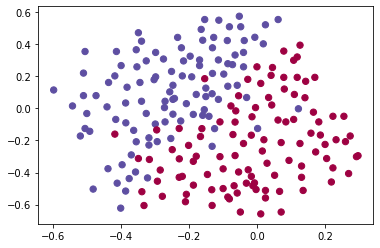

In [1]:
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T
print(test_X.shape)
print(test_y.shape)

plt.scatter(train_X[0, :], train_X[1, :], c=train_y[0, :], s=40, cmap=plt.cm.Spectral);





In [2]:
from keras import models
from keras import layers
from keras.layers import Dense
import numpy as np

model = models.Sequential()
model.add(Dense(50, activation='relu', input_shape=(2,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 500 epochs
model.fit(train_X.T, train_y.T, epochs=500, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_X.T, test_y.T)
print('Test accuracy:', test_acc)

Epoch 1/500
7/7 [==============================] - 2s 9ms/step - loss: 0.6909 - accuracy: 0.6019
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.8104
Epoch 3/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6806 - accuracy: 0.8009
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6737 - accuracy: 0.8199
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6649 - accuracy: 0.8246
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6534 - accuracy: 0.8294
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.8483
Epoch 8/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6182 - accuracy: 0.8578
Epoch 9/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5946 - accuracy: 0.8673
Epoch 10/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5665 - accuracy: 0.8768
Epoch 11/500
7/7 [==========

In [3]:
from tensorflow.keras.regularizers import l2

# Define the neural network model with L2 regularization
model1 = models.Sequential()
model1.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
model1.add(Dense(25, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and Adam optimizer
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 500 epochs
model1.fit(train_X.T, train_y.T, epochs=500, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(test_X.T, test_y.T)
print('Test accuracy:', test_acc)


Epoch 1/500
7/7 [==============================] - 1s 3ms/step - loss: 1.1943 - accuracy: 0.3744
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1573 - accuracy: 0.6967
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.1224 - accuracy: 0.8246
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 1.0893 - accuracy: 0.8436
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.0578 - accuracy: 0.8436
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 1.0284 - accuracy: 0.8483
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 1.0004 - accuracy: 0.8531
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.9736 - accuracy: 0.8578
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.9475 - accuracy: 0.8531
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.9215 - accuracy: 0.8578
Epoch 11/500
7/7 [===========

17010/17010 [==============================] - 30s 2ms/step


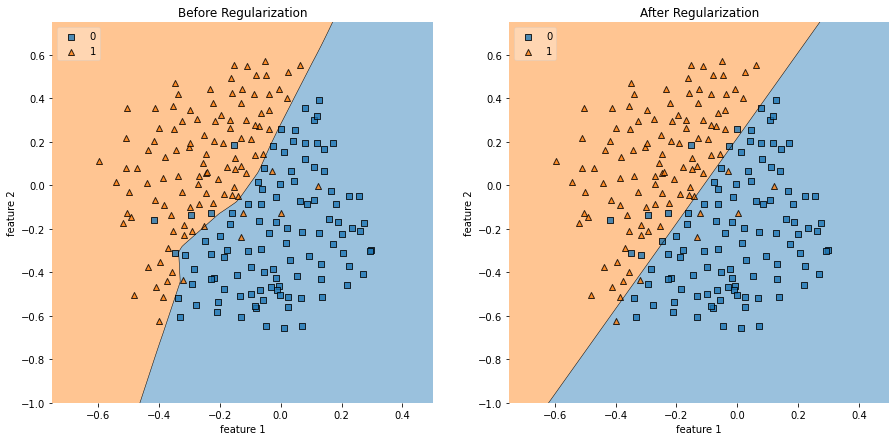

In [4]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from matplotlib import axis


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
plot_decision_regions(train_X.T, train_y.flatten(), clf=model, legend=2,ax=ax1)
ax1.set_title('Before Regularization')
ax1.set_xlim([-0.75, 0.5])
ax1.set_ylim([-1, 0.75])

ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 2')
plot_decision_regions(train_X.T, train_y.flatten(), clf=model1, legend=2,ax=ax2)
ax2.set_title('After Regularization')
ax2.set_xlim([-0.75, 0.5])
ax2.set_ylim([-1, 0.75])
plt.show()
